# Proyecto Final 
### **Diccionario de datos**
- rate_marriage: How rate marriage(como califica su matrimonio)

   - 1 = very poor (muy pobre)

   - 2 = poor (pobre)

   - 3 = fair (justa)

    - 4 = good (buena)

   - 5 = very good (muy buena)

- age: la edad

- yrs_married: años de casada

- children: No Children

- religious: how religious (cuán religioso), 1:not (no), 2:midly(medianamente) , 3:faily(deficientemente) , 4:strongly(fuertemente)

- educ: nivel de educación,
9 = grade school
12= high school
14= some college
16= college graduate
17=some graduate school
20=advance degree

- ocupation: Ocupación
1= student
2= farming, agriculture, some-skilled, unskilled worker
3= white-colloar
4= teacher-counseler social worker, nursing, artirst, writers, technician, skiller worker
5= managerial

In [1]:
# Importamos librerias 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Librerias adicionales 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import cohen_kappa_score

In [ ]:
data =  ("Data")
df = pd.read_csv(data, delimiter=',')
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3,32.0,9.0,3.0,3,17,2,5,1
1,3,27.0,13.0,3.0,1,14,3,4,1
2,4,22.0,2.5,0.0,1,16,3,5,1
3,4,37.0,16.5,4.0,3,16,5,5,1
4,5,27.0,9.0,1.0,1,14,3,4,1


In [4]:
df.shape

(6366, 9)

In [5]:
df['affair'].value_counts()

affair
0    4313
1    2053
Name: count, dtype: int64

In [6]:
X = df.drop("affair", axis=1)
y = df.affair
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3,32.0,9.0,3.0,3,17,2,5
1,3,27.0,13.0,3.0,1,14,3,4
2,4,22.0,2.5,0.0,1,16,3,5
3,4,37.0,16.5,4.0,3,16,5,5
4,5,27.0,9.0,1.0,1,14,3,4


In [7]:
from sklearn.feature_selection import SelectKBest

# Selecciona las mejores características basándose en una función estadística.
best = SelectKBest(k= 4) # Selecciona las 4 mejores características.

# Ajusta y transforma el conjunto de datos X usando las etiquetas y. 
X_new = best.fit_transform(X, y)
# Muestra las dimensiones del nuevo conjunto de datos después de la selección de características.
X_new.shape
# Obtiene los índices de las características seleccionadas.
selected = best.get_support(indices= True)
# Imprime las columnas seleccionadas.
print(X.columns[selected])

Index(['rate_marriage', 'age', 'yrs_married', 'children'], dtype='object')


In [8]:
X_new

array([[ 3. , 32. ,  9. ,  3. ],
       [ 3. , 27. , 13. ,  3. ],
       [ 4. , 22. ,  2.5,  0. ],
       ...,
       [ 5. , 22. ,  2.5,  0. ],
       [ 5. , 32. ,  6. ,  1. ],
       [ 4. , 22. ,  2.5,  0. ]])

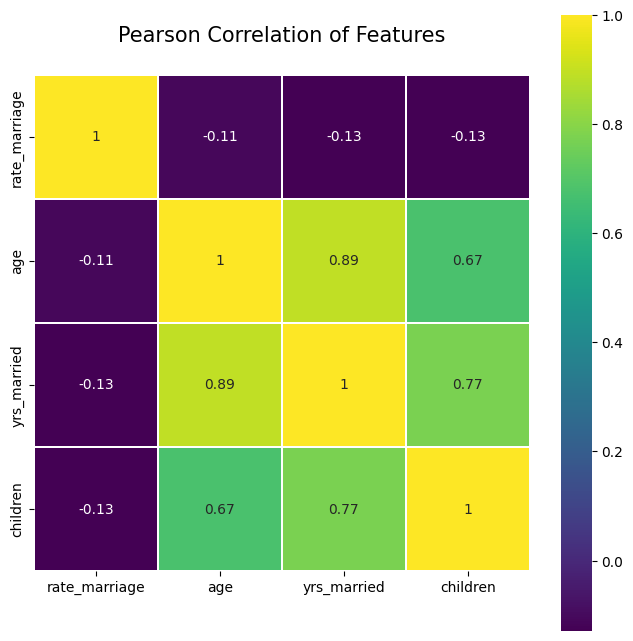

In [9]:
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

used_features = X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize = (8,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [10]:
X = df[used_features]

In [11]:
X.head(4)

,rate_marriage,age,yrs_married,children
0,3,32.0,9.0,3.0
1,3,27.0,13.0,3.0
2,4,22.0,2.5,0.0
3,4,37.0,16.5,4.0


In [12]:
from sklearn.preprocessing import StandardScaler
# Separar el dataframe en datos de train y datos de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#,stratify=y)

# Escalar los datos de entrada
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_test.shape, X_train.shape

((1274, 4), (5092, 4))

### ***1. Regresión Logística***

#####  Descripción: La regresión logística es un algoritmo de aprendizaje supervisado utilizado para tareas de clasificación binaria. Modela la probabilidad de que una instancia pertenezca a una clase particular utilizando la función logística (sigmoide). Es adecuado cuando las relaciones entre las variables son lineales y es eficiente para grandes conjuntos de datos.

Características principales:

- Basada en la función logística.
- Salida entre 0 y 1.
- Regularización L1 (Lasso) y L2 (Ridge) para evitar el sobreajuste.

Uso común:

- Predicción de resultados binarios (sí/no, verdadero/falso).
- Problemas de clasificación médica (presencia/ausencia de enfermedad).

In [14]:
# Crea un modelo de regresión logística con los parámetros especificados.
modelo = linear_model.LogisticRegression(
    C= 0.03,                # Parámetro de regularización inversa; valores más pequeños especifican una regularización más fuerte.
    solver = 'liblinear',   # Algoritmo utilizado en el problema de optimización.
    max_iter = 100,         # Número máximo de iteraciones para la convergencia del algoritmo de optimización.
    random_state= None      # Semilla del generador de números aleatorios para asegurar la reproducibilidad; None significa que no hay una semilla fija.
)

In [15]:
#Entrenamiento del Modelo
modelo.fit(X_train_scaled,y_train)

LogisticRegression(C=0.03, solver='liblinear')

In [17]:
from sklearn import model_selection

# Semilla para asegurar la reproducibilidad.
seed = 7

# Nombre del modelo para su identificación en los resultados.
name = 'Logistic Regression'

# Configuración de la validación cruzada con 10 particiones (folds).
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

# Evaluación del modelo utilizando validación cruzada.
cv_results = model_selection.cross_val_score(
    modelo,             # El modelo de regresión logística previamente definido.
    X_train,            # Conjunto de datos de entrenamiento.
    y_train,            # Etiquetas del conjunto de datos de entrenamiento.
    cv=kfold,           # Especificación del método de validación cruzada.
    scoring='accuracy'  # Métrica de evaluación, en este caso, la precisión.
)

# Mensaje que muestra el nombre del modelo y los resultados de la validación cruzada (media y desviación estándar).
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

# Imprime el mensaje con los resultados de la validación cruzada.
print(msg)


Logistic Regression: 0.707975 (0.017000)


In [18]:
# Predecimos sobre nuestro set de traint
prediccion = modelo.predict(X_test_scaled)
print(prediccion)

[0 1 0 ... 0 0 0]


Generamos las metricas de evaluación

"Accuracy" es la precisión { Si recordamos, la exactitud (o «accuracy«) representa el porcentaje de predicciones correctas frente al total.}

"Precision" es la exactitud {La precisión, (o“precision”) se refiere a lo cerca que está el resultado de una predicción del valor verdadero. }

"Recall" es la sensibilidad {La sensibilidad (o recall) representa la tasa de verdaderos positivos (True Positive Rate) ó TP.}

In [19]:
print("Accuracy:",accuracy_score(y_test, prediccion))
print("Recall:",recall_score(y_test, prediccion))
print("Precision:", precision_score(y_test, prediccion))
print("F1:", f1_score(y_test, prediccion))
print("R2:", r2_score(y_test, prediccion))

Accuracy: 0.717425431711146
Recall: 0.33176470588235296
Precision: 0.6497695852534562
F1: 0.4392523364485981
R2: -0.2710870920806485


In [20]:
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       849
           1       0.65      0.33      0.44       425

    accuracy                           0.72      1274
   macro avg       0.69      0.62      0.63      1274
weighted avg       0.70      0.72      0.69      1274



In [21]:
# Generamos la matriz de confusión

cnf_matrix=confusion_matrix(y_test, prediccion)
cnf_matrix

array([[773,  76],
       [284, 141]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

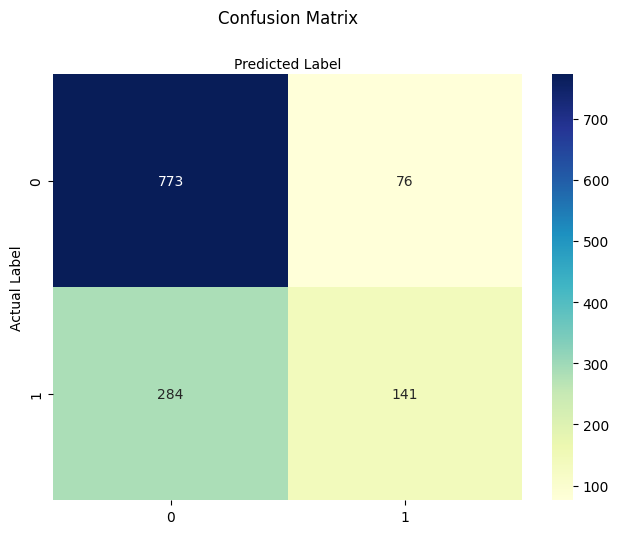

In [22]:
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [23]:
# Creamos el AUC y la curva ROC 
# Obtenemos las probabilidades  
lr_probs = modelo.predict_proba(X_test_scaled)

# Obtenemos las probabilidades de la clase positiva
lr_probs = lr_probs[:,1]
lr_probs

array([0.48142458, 0.50580949, 0.27251233, ..., 0.41765284, 0.42389009,
       0.42636153])

***Manera 1***

In [24]:
# Obtener los puntos de la curva ROC 
fpr, tpr, _ = roc_curve(y_test, lr_probs)

# Calcular el AUC 
auc_values = auc(fpr, tpr)
print("AUC Score using roc_auc_score:", auc_values)

AUC Score using roc_auc_score: 0.7377108016351417


***Manera 2 + indice kappa***

In [26]:
# Calculamos auc
roc_auc = roc_auc_score(y_test, lr_probs)
print("AUC: {:.3f}".format(roc_auc))

# Calculamos el kappa 
kappa = cohen_kappa_score(y_test, prediccion, weights='quadratic')
print("Kappa: {:.3f}".format(kappa))


AUC: 0.738
Kappa: 0.276


In [27]:
# Lista para crear el histograma del AUC
hist_auc = []
hist_auc.append(roc_auc)
hist_auc


[0.7377108016351417]

In [28]:
acc = accuracy_score(y_test, prediccion)
accuracy = [] # Lista para graficar los accuracy de todos los modelos
accuracy.append(acc)
accuracy

[0.717425431711146]

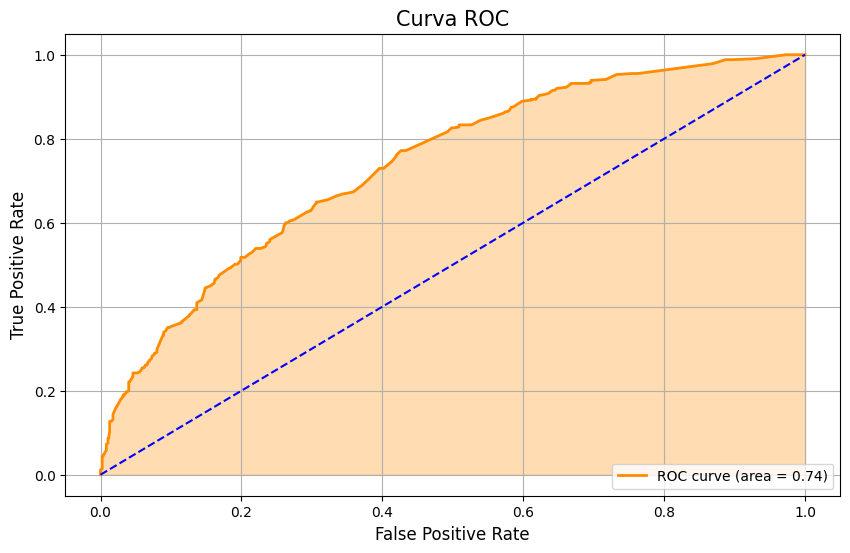

In [29]:
# Creamos el gráfico
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.plot(fpr, tpr, color='darkorange', linestyle='-', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Cambia el color y el estilo de la línea
plt.plot([0,1], [0, 1], color='blue', linestyle='--')  # Línea diagonal de referencia
plt.fill_between(fpr, tpr, alpha=0.3, color='darkorange')  # Área bajo la curva
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Curva ROC', fontsize=15)
plt.legend(loc='lower right')  # Posición de la leyenda
plt.grid(True)  # Agrega una cuadrícula

# Muestra el gráfico
plt.show()

### ***2. Usando Árboles de Decisión***

##### Descripción: Los árboles de decisión son modelos de predicción que dividen iterativamente el espacio de características en subconjuntos basados en ciertas condiciones. Cada nodo interno representa una característica, y cada rama representa un resultado de la condición. Las hojas representan etiquetas de clase o valores de regresión.

Características principales:

- Fácil de interpretar y visualizar.
- Capacidad para manejar datos categóricos y continuos.
- Susceptible al sobreajuste sin poda adecuada.

Uso común:

- Segmentación de mercado.
- Diagnóstico médico.
- Análisis de riesgos financieros.

In [30]:
from sklearn.tree import DecisionTreeClassifier
# Crear el modelo de Arbol para Clasificación.
modelotree = DecisionTreeClassifier(
    max_depth = 3 # Profundidad máxima del árbol. Limitar la profundidad ayuda a prevenir el sobreajuste.
    )

In [31]:
#Entrenamiento del Modelo
modelotree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
# Predecimos sobre nuestro set de traint
pred_test = modelotree.predict(
    X_test_scaled # Conjunto de características de prueba, escalado según sea necesario.
    )

In [33]:
print('Accuracy sobre conjunto de Test:', accuracy_score(pred_test,y_test))

Accuracy sobre conjunto de Test: 0.716640502354788


Profundida del árbol:3
Número de nodos terminales:8


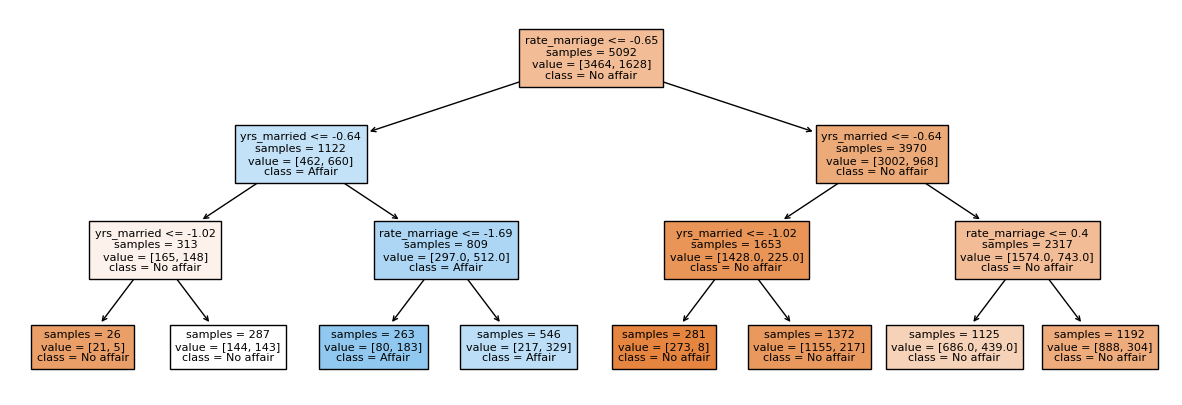

In [34]:
from sklearn.tree import plot_tree

# Estructura del árbol creado
# ---------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize = (15, 5))

print(f"Profundida del árbol:{modelotree.get_depth()}")
print(f"Número de nodos terminales:{modelotree.get_n_leaves()}")

class_names = ["No affair", "Affair"] 

plot = plot_tree(
            decision_tree = modelotree,
            feature_names = df.drop(columns = "affair").columns,
            class_names   = class_names,
            filled        = True,
            impurity      = False,
            fontsize      = 8,
            precision     = 2,
            ax            = ax
        )

In [35]:
# Generamos la matriz de confusión.
cnf_matrix=confusion_matrix(y_test, pred_test)
cnf_matrix

array([[759,  90],
       [271, 154]], dtype=int64)

In [36]:
print("Accuracy: ",accuracy_score(y_test,pred_test))
print("Recall: ",recall_score(y_test,pred_test))
print("Precision: ",precision_score(y_test,pred_test))
print("F1: ",f1_score(y_test,pred_test))
print("R2: ",r2_score(y_test,pred_test))

Accuracy:  0.716640502354788
Recall:  0.3623529411764706
Precision:  0.6311475409836066
F1:  0.46038863976083705
R2:  -0.2746178895586502


In [37]:
# Creamos el AUC y la curva ROC 
# Obtenemos las probabilidades  
lr_prob = modelotree.predict_proba(X_test_scaled)

In [38]:
# Obtenemos las probabilidades de la clase positiva
lr_prob = lr_prob[:,1]
lr_prob

array([0.39022222, 0.6025641 , 0.15816327, ..., 0.39022222, 0.49825784,
       0.49825784])

***Manera 1***

In [39]:
# Obtener los puntos de la curva ROC 
fpr, tpr, _ = roc_curve(y_test, lr_prob)

# Calcular el AUC 
auc_values_tree = auc(fpr, tpr)
print("AUC Score using roc_auc_score:", auc_values_tree)

AUC Score using roc_auc_score: 0.7254846532252477


***Manera 2 + indice kappa***

In [40]:
# Calculamos auc
roc_auc = roc_auc_score(y_test, lr_prob)
print("AUC: {:.3f}".format(roc_auc))

# Calculamos el kappa 
kappa = cohen_kappa_score(y_test, pred_test, weights='quadratic')
print("Kappa: {:.3f}".format(kappa))

AUC: 0.725
Kappa: 0.287


In [41]:
hist_auc.append(roc_auc)
hist_auc

[0.7377108016351417, 0.7254846532252477]

[0.717425431711146, 0.716640502354788]


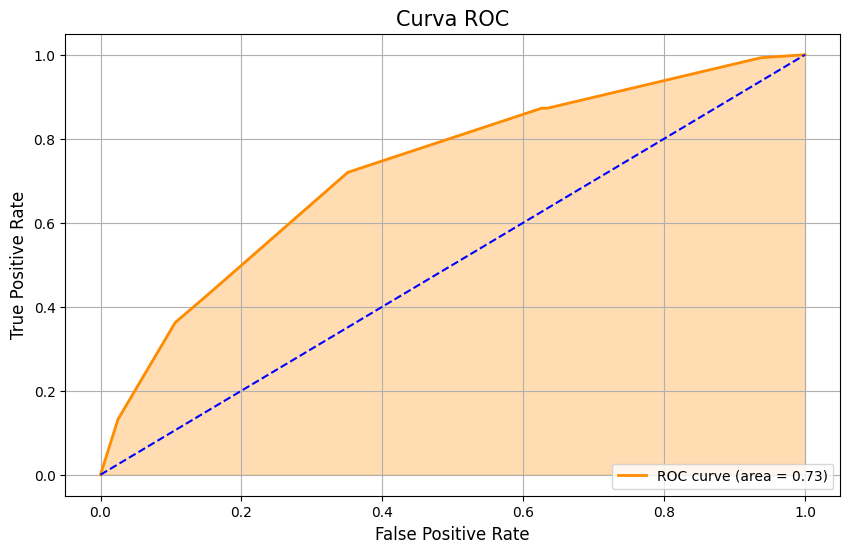

In [42]:
acc1 = accuracy_score(y_test,pred_test)
accuracy.append(acc1)
print(accuracy)

# Creamos el gráfico
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.plot(fpr, tpr, color='darkorange', linestyle='-', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Cambia el color y el estilo de la línea
plt.plot([0,1], [0, 1], color='blue', linestyle='--')  # Línea diagonal de referencia
plt.fill_between(fpr, tpr, alpha=0.3, color='darkorange')  # Área bajo la curva
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Curva ROC', fontsize=15)
plt.legend(loc='lower right')  # Posición de la leyenda
plt.grid(True)  # Agrega una cuadrícula

# Muestra el gráfico
plt.show()

### ***3. Random Forest***

##### Descripción: Random Forest es un conjunto de árboles de decisión, generalmente entrenados con el método "bagging". El resultado final se obtiene promediando las predicciones de los árboles individuales (para regresión) o mediante votación mayoritaria (para clasificación).

Características principales:

- Reduce el sobreajuste en comparación con árboles de decisión individuales.
- Maneja bien grandes conjuntos de datos con muchas características.
- Proporciona una estimación de la importancia de las características.

Uso común:

- Detección de fraudes.
- Clasificación de imágenes.
- Sistemas de recomendación.

In [43]:
# Importa el clasificador de Random Forest del módulo ensemble de sklearn.
from sklearn.ensemble import RandomForestClassifier


# Crea un modelo de Random Forest con los parámetros especificados.
modelRF = RandomForestClassifier(
    max_depth=3,              # Profundidad máxima de los árboles individuales. Limitar la profundidad ayuda a prevenir el sobreajuste.
    criterion='entropy',      # Función para medir la calidad de una división. 'entropy' es la entropía de información.
    min_samples_split=5,      # Número mínimo de muestras necesarias para dividir un nodo.
    min_samples_leaf=2,       # Número mínimo de muestras que debe tener un nodo hoja.
    n_estimators=20           # Número de árboles en el bosque.
)

# Entrena el modelo de Random Forest con el conjunto de datos de entrenamiento escalado.
modelRF.fit(X_train_scaled, y_train)

# Realiza predicciones en el conjunto de datos de prueba escalado.
y_pred = modelRF.predict(X_test_scaled)

# Calcula la precisión del modelo comparando las predicciones con las etiquetas reales.
randomForest_score = accuracy_score(y_test, y_pred)

# Imprime la precisión del modelo de Random Forest.
print("Random Forest Score :{}".format(randomForest_score))


Random Forest Score :0.716640502354788


In [44]:
# Generamos la matriz de confusión

cnf_matrix=confusion_matrix(y_test, y_pred)
cnf_matrix

array([[756,  93],
       [268, 157]], dtype=int64)

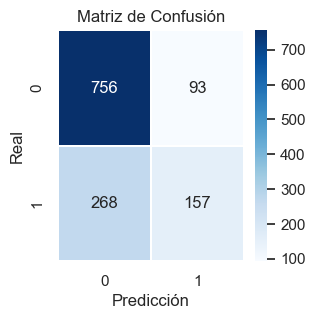

In [45]:
sns.set()

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
f, (ax1) = plt.subplots(figsize=(3,3),nrows=1)

# crear mapa de calor dibujar mapa de calor: cmap="Reds"
sns.heatmap(pd.DataFrame(cm),linewidths = 0.05, annot=True, cmap="Blues",fmt='g')
ax1.set_title('Matriz de Confusión') #título
ax1.set_xlabel('Predicción') #eje x
ax1.set_ylabel('Real') #eje y
f.savefig('RF-1.jpg')

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       849
           1       0.63      0.37      0.47       425

    accuracy                           0.72      1274
   macro avg       0.68      0.63      0.64      1274
weighted avg       0.70      0.72      0.69      1274



In [47]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("R2: ",r2_score(y_test,y_pred))

Accuracy:  0.716640502354788
Recall:  0.36941176470588233
Precision:  0.628
F1:  0.4651851851851852
R2:  -0.2746178895586502


In [48]:
# Creamos el AUC y la curva ROC 
# Obtenemos las probabilidades  
lr_prob_forest = modelRF.predict_proba(X_test_scaled)

# Obtenemos las probabilidades de la clase positiva 
lr_prob_forest = lr_prob_forest[:, 1]
lr_prob_forest

array([0.3619864 , 0.61173871, 0.17327046, ..., 0.36522083, 0.46781445,
       0.44209315])

In [49]:
# Obtenemos los puntos de la curva ROC 
fpr, tpr, _ = roc_curve(y_test, lr_prob_forest)

# Calcular el AUC 
auc_values_forest = auc(fpr, tpr)
print("AUC Score using roc_auc_score:", auc_values_forest)

AUC Score using roc_auc_score: 0.7281673941661472


***Manera 2 + indice kappa***

In [50]:
# Calculamos auc
roc_auc = roc_auc_score(y_test, lr_prob_forest)
print("AUC: {:.3f}".format(roc_auc))

# Calculamos el kappa 
kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print("Kappa: {:.3f}".format(kappa))

AUC: 0.728
Kappa: 0.290


In [51]:
hist_auc.append(roc_auc)
hist_auc

[0.7377108016351417, 0.7254846532252477, 0.7281673941661472]

[0.717425431711146, 0.716640502354788, 0.716640502354788]


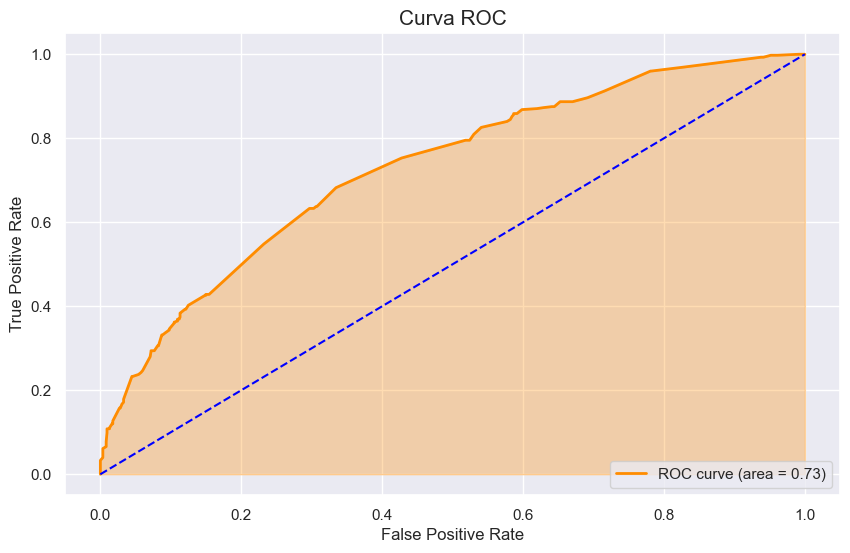

In [52]:
acc2 = accuracy_score(y_test,y_pred)
accuracy.append(acc2)
print(accuracy)

# Creamos el gráfico
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.plot(fpr, tpr, color='darkorange', linestyle='-', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Cambia el color y el estilo de la línea
plt.plot([0,1], [0, 1], color='blue', linestyle='--')  # Línea diagonal de referencia
plt.fill_between(fpr, tpr, alpha=0.3, color='darkorange')  # Área bajo la curva
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Curva ROC', fontsize=15)
plt.legend(loc='lower right')  # Posición de la leyenda
plt.grid(True)  # Agrega una cuadrícula

# Muestra el gráfico
plt.show()

### ***4. Máquinas de Vectores de Soporte SVM***

##### Descripción: SVM es un algoritmo de aprendizaje supervisado que encuentra el hiperplano que mejor separa las clases en el espacio de características. Utiliza la técnica del kernel para manejar datos no lineales.

Características principales:

- Eficiente en espacios de alta dimensión.
- Soporta diferentes funciones kernel (lineal, polinómico, RBF).
- Sensible a la escala de los datos.

Uso común:

- Clasificación de texto y reconocimiento de escritura.
- Bioinformática (clasificación de genes).
- Reconocimiento de imágenes.

In [53]:
# Importa el clasificador SVM del módulo sklearn.
from sklearn import svm
from sklearn.metrics import accuracy_score

# Crea un modelo de SVM con un kernel radial basis function (RBF).
modelSVM = svm.SVC(
    kernel='rbf', # Kernel radial basis function (RBF) para el SVM. Es adecuado para problemas no lineales.
    probability = True
)

# Entrena el modelo SVM con el conjunto de datos de entrenamiento escalado.
modelSVM.fit(X_train_scaled, y_train)

# Realiza predicciones en el conjunto de datos de prueba escalado.
y_pred = modelSVM.predict(X_test_scaled)

# Calcula la precisión del modelo comparando las predicciones con las etiquetas reales.
svm_score = accuracy_score(y_test, y_pred)

# Imprime la precisión del modelo SVM.
print("SVM's Accuracy: {0}".format(svm_score))


SVM's Accuracy: 0.7182103610675039


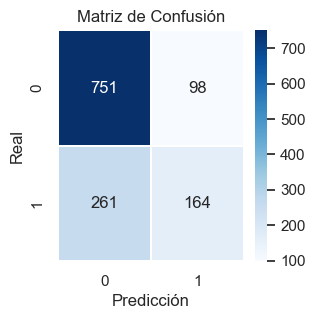

In [54]:
sns.set()

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
f, (ax1) = plt.subplots(figsize=(3,3),nrows=1)

# crear mapa de calor dibujar mapa de calor: cmap="Reds"
sns.heatmap(pd.DataFrame(cm),linewidths = 0.05, annot=True, cmap="Blues",fmt='g')
ax1.set_title('Matriz de Confusión') #título
ax1.set_xlabel('Predicción') #eje x
ax1.set_ylabel('Real') #eje y
f.savefig('SVM-1.jpg')

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       849
           1       0.63      0.39      0.48       425

    accuracy                           0.72      1274
   macro avg       0.68      0.64      0.64      1274
weighted avg       0.70      0.72      0.70      1274



In [56]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("R2: ",r2_score(y_test,y_pred))

Accuracy:  0.7182103610675039
Recall:  0.38588235294117645
Precision:  0.6259541984732825
F1:  0.4774381368267831
R2:  -0.2675562946026466


In [57]:
# Creamos el AUC y la curva ROC 
# Obtenemos las probabilidades 
lr_prob_svm = modelSVM.predict_proba(X_test_scaled)

# Obtenemos las probabilidades de la clase positiva
lr_prob_svm = lr_prob_svm[:, 1]
lr_prob_svm

array([0.24026307, 0.69146592, 0.24029214, ..., 0.24030621, 0.41514591,
       0.36480763])

***Manera 1***

In [58]:
# Obtener los puntos de la curva ROC 
fpr, tpr,_ = roc_curve(y_test, lr_prob_svm)

# Calcular el AUC
auc_values_svm = auc(fpr, tpr)
print("AUC Score using roc_auc score:", auc_values_svm)

AUC Score using roc_auc score: 0.7045853252961962


***Manera 2***

In [59]:
# Calculamos auc 
roc_auc = roc_auc_score(y_test, lr_prob_svm)
print("AUC: {:.3f}".format(roc_auc))

# Calculamos el kappa 
kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print("Kappa: {:.3f}".format(kappa))

AUC: 0.705
Kappa: 0.299


In [60]:
hist_auc.append(roc_auc)
hist_auc

[0.7377108016351417,
 0.7254846532252477,
 0.7281673941661472,
 0.7045853252961962]

[0.717425431711146, 0.716640502354788, 0.716640502354788, 0.7182103610675039]


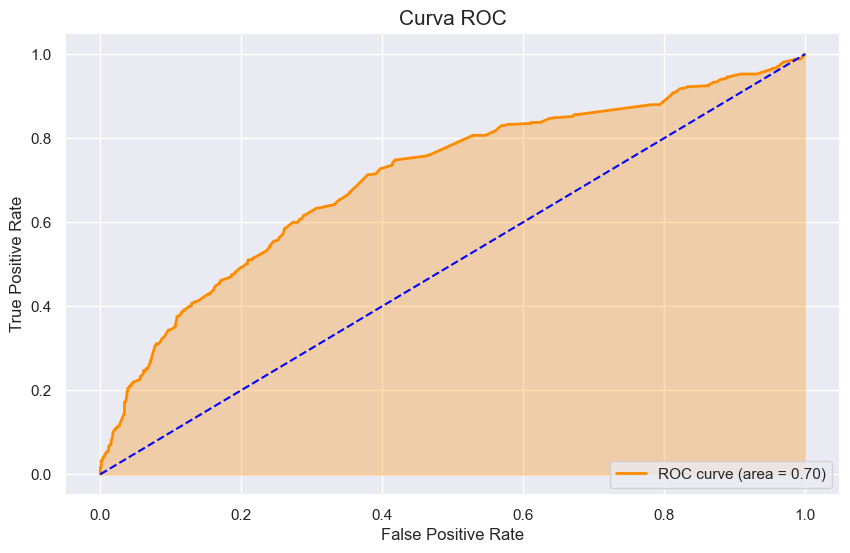

In [61]:
acc3 = accuracy_score(y_test,y_pred)
accuracy.append(acc3)
print(accuracy)

# Creamos el gráfico
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.plot(fpr, tpr, color='darkorange', linestyle='-', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Cambia el color y el estilo de la línea
plt.plot([0,1], [0, 1], color='blue', linestyle='--')  # Línea diagonal de referencia
plt.fill_between(fpr, tpr, alpha=0.3, color='darkorange')  # Área bajo la curva
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Curva ROC', fontsize=15)
plt.legend(loc='lower right')  # Posición de la leyenda
plt.grid(True)  # Agrega una cuadrícula

# Muestra el gráfico
plt.show()

### ***5. Modelos Basados en Boosting - - Gradient Boosting***

##### Descripción: Gradient Boosting es un método de ensamble que construye modelos aditivos en una secuencia de manera iterativa. Cada modelo nuevo corrige los errores cometidos por los modelos anteriores.

Características principales:

- Maneja bien datos sesgados y distribuciones complejas.
- Permite ajustar muchos parámetros para controlar el aprendizaje.
- Susceptible al sobreajuste si no se regula adecuadamente.

Uso común:

- Clasificación y regresión.
- Competencias de ciencia de datos (por su alta precisión).

In [62]:
# 1. GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

modelGB = GradientBoostingClassifier(random_state=100,
          n_estimators=100,min_samples_split=100, max_depth=3)

modelGB.fit(X_train_scaled, y_train)

y_pred = modelGB.predict(X_test_scaled)

gbk_score = modelGB.score(X_test_scaled,y_test)

gbos_score=accuracy_score(y_test, y_pred)

print("Gradient Boosting Score :",gbos_score)

Gradient Boosting Score : 0.7197802197802198


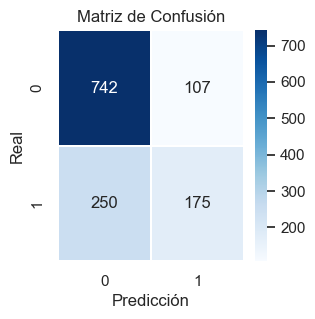

In [63]:
sns.set()

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
f, (ax1) = plt.subplots(figsize=(3,3),nrows=1)

# crear mapa de calor dibujar mapa de calor: cmap="Reds"
sns.heatmap(pd.DataFrame(cm),linewidths = 0.05, annot=True, cmap="Blues",fmt='g')
ax1.set_title('Matriz de Confusión') #título
ax1.set_xlabel('Predicción') #eje x
ax1.set_ylabel('Real') #eje y
f.savefig('GB-1.jpg')

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       849
           1       0.62      0.41      0.50       425

    accuracy                           0.72      1274
   macro avg       0.68      0.64      0.65      1274
weighted avg       0.71      0.72      0.70      1274



In [65]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("R2: ",r2_score(y_test,y_pred))

Accuracy:  0.7197802197802198
Recall:  0.4117647058823529
Precision:  0.6205673758865248
F1:  0.49504950495049505
R2:  -0.26049469964664307


In [66]:
# Creamos el AUC y la curva ROC 
# Obtenemos las probabilidades
lr_prob_gb = modelGB.predict_proba(X_test_scaled)

# Obtenemos las probabilidades de la clase positiva 
lr_prob_gb = lr_prob_gb[:,1]
lr_prob_gb

array([0.34337174, 0.60245888, 0.19265009, ..., 0.39051668, 0.48815053,
       0.48704194])

***Manera 1***

In [67]:
# Obtener los puntos de la curva ROC 
fpr, tpr,_ = roc_curve(y_test, lr_prob_gb)

# calcular el AUC 
auc_values_gb = auc(fpr, tpr)
print("AUC Score using roc_auc_score:", auc_values_gb)

AUC Score using roc_auc_score: 0.7355421603270282


***Manera 2***

In [68]:
# Calculamos el auc 
roc_auc = roc_auc_score(y_test, lr_prob_gb)
print("AUC: {:.3f}".format(roc_auc))

# Calculamos el kappa 
kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print("Kappa: {:.3f}".format(kappa))

AUC: 0.736
Kappa: 0.312


In [70]:
hist_auc.append(roc_auc)
hist_auc

[0.7377108016351417,
 0.7254846532252477,
 0.7281673941661472,
 0.7045853252961962,
 0.7355421603270282]

[0.717425431711146, 0.716640502354788, 0.716640502354788, 0.7182103610675039, 0.7197802197802198]


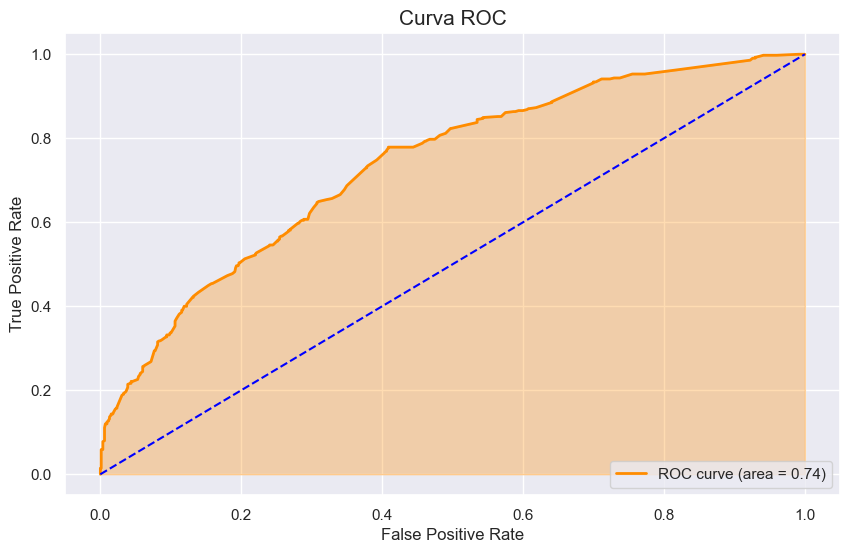

In [69]:
acc4 = accuracy_score(y_test,y_pred)
accuracy.append(acc4)
print(accuracy)

# Creamos el gráfico
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.plot(fpr, tpr, color='darkorange', linestyle='-', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Cambia el color y el estilo de la línea
plt.plot([0,1], [0, 1], color='blue', linestyle='--')  # Línea diagonal de referencia
plt.fill_between(fpr, tpr, alpha=0.3, color='darkorange')  # Área bajo la curva
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Curva ROC', fontsize=15)
plt.legend(loc='lower right')  # Posición de la leyenda
plt.grid(True)  # Agrega una cuadrícula

# Muestra el gráfico
plt.show()

### ***6. Modelos Basados en Boosting - - XGBoost***

Descripción: XGBoost (Extreme Gradient Boosting) es una implementación optimizada y eficiente de Gradient Boosting. Está diseñado para velocidad y rendimiento, incluyendo técnicas como el manejo de datos faltantes y la paralelización.

Características principales:

- Alta eficiencia y escalabilidad.
- Regularización L1 y L2.
- Soporte para paralelización y manejo de datos faltantes.

Uso común:

- Competencias de Kaggle.
- Modelos de predicción en finanzas.
- Sistemas de recomendación.

In [71]:
# 2.Importa el clasificador XGBoost del módulo xgboost.
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Crea un modelo de XGBoost con los parámetros especificados.
xgb_classifier = xgb.XGBClassifier(
    learning_rate=0.01,    # Tasa de aprendizaje (learning rate). Valores más pequeños hacen el entrenamiento más lento pero pueden mejorar la precisión.
    n_estimators=200,       # Número de árboles (estimadores) en el modelo.
    max_depth=3,            # Profundidad máxima de cada árbol. Limitar la profundidad ayuda a prevenir el sobreajuste.
    subsample=0.8,          # Submuestra aleatoria de los datos de entrenamiento. 0.8 significa usar el 80% de los datos para entrenar cada árbol.
    colsample_bytree=0.8,   # Submuestra de las características al construir cada árbol. 0.8 significa usar el 80% de las características.
    reg_alpha=0.1,          # Regularización L1 (alpha). Valores mayores implican una regularización más fuerte.
    reg_lambda=0.1          # Regularización L2 (lambda). Valores mayores implican una regularización más fuerte.
)

# Entrena el modelo de XGBoost con el conjunto de datos de entrenamiento escalado.
xgb_classifier.fit(X_train_scaled, y_train)

# Realiza predicciones en el conjunto de datos de prueba escalado.
y_pred = xgb_classifier.predict(X_test_scaled)

# Calcula la precisión del modelo comparando las predicciones con las etiquetas reales.
gbos_score = accuracy_score(y_test, y_pred)

# Imprime la precisión del modelo XGBoost.
print("XGBoost Score :", gbos_score)


XGBoost Score : 0.7189952904238619


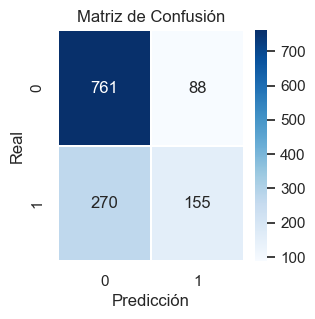

In [72]:
sns.set()

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
f, (ax1) = plt.subplots(figsize=(3,3),nrows=1)

# crear mapa de calor dibujar mapa de calor: cmap="Reds"
sns.heatmap(pd.DataFrame(cm),linewidths = 0.05, annot=True, cmap="Blues",fmt='g')
ax1.set_title('Matriz de Confusión') #título
ax1.set_xlabel('Predicción') #eje x
ax1.set_ylabel('Real') #eje y
f.savefig('XGB-1.jpg')

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       849
           1       0.64      0.36      0.46       425

    accuracy                           0.72      1274
   macro avg       0.69      0.63      0.64      1274
weighted avg       0.70      0.72      0.69      1274



In [74]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("R2: ",r2_score(y_test,y_pred))

Accuracy:  0.7189952904238619
Recall:  0.36470588235294116
Precision:  0.6378600823045267
F1:  0.46407185628742514
R2:  -0.26402549712464474


In [75]:
# Creamos el AUC y la curva ROC 
# Obtenemos las probabilidades
lr_prob_xb = xgb_classifier.predict_proba(X_test_scaled)

# Obtenemos las probabilidades de la clase positiva 
lr_prob_xb = lr_prob_xb[:,1]
lr_prob_xb

array([0.388171  , 0.5559643 , 0.20319366, ..., 0.390791  , 0.4497086 ,
       0.44981495], dtype=float32)

***Manera 1***

In [76]:
# Obtener los puntos de la curva ROC 
fpr, tpr,_ = roc_curve(y_test, lr_prob_xb)

# calcular el AUC 
auc_values_xb = auc(fpr, tpr)
print("AUC Score using roc_auc_score:", auc_values_xb)

AUC Score using roc_auc_score: 0.7358179172729163


***Manera 2***

In [77]:
# Calculamos auc
roc_auc = roc_auc_score(y_test, lr_prob_xb)
print("AUC: {:.3f}".format(roc_auc))

# Calculamos el kappa 
kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print("Kappa: {:.3f}".format(kappa))

AUC: 0.736
Kappa: 0.292


In [78]:
hist_auc.append(roc_auc)
hist_auc

[0.7377108016351417,
 0.7254846532252477,
 0.7281673941661472,
 0.7045853252961962,
 0.7355421603270282,
 0.7358179172729163]

[0.717425431711146, 0.716640502354788, 0.716640502354788, 0.7182103610675039, 0.7197802197802198, 0.7189952904238619]


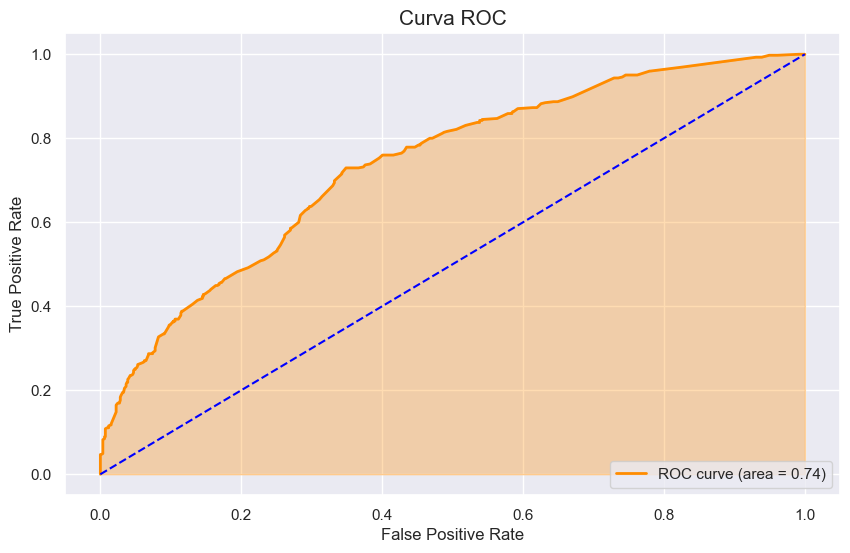

In [79]:
acc5 = accuracy_score(y_test,y_pred)
accuracy.append(acc5)
print(accuracy)

# Creamos el gráfico
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.plot(fpr, tpr, color='darkorange', linestyle='-', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Cambia el color y el estilo de la línea
plt.plot([0,1], [0, 1], color='blue', linestyle='--')  # Línea diagonal de referencia
plt.fill_between(fpr, tpr, alpha=0.3, color='darkorange')  # Área bajo la curva
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Curva ROC', fontsize=15)
plt.legend(loc='lower right')  # Posición de la leyenda
plt.grid(True)  # Agrega una cuadrícula

# Muestra el gráfico
plt.show()

### ***7. Modelos Basados en Boosting - - LightGBM***

##### Descripción: LightGBM es una implementación de Gradient Boosting diseñada para ser altamente eficiente, especialmente con grandes conjuntos de datos. Utiliza técnicas como el crecimiento basado en hojas y la reducción de datos para aumentar la velocidad y reducir la memoria.

Características principales:

- Alta velocidad y baja memoria.
- Soporte para categorización directa de datos.
- Manejo de grandes volúmenes de datos.

Uso común:

- Clasificación y regresión con grandes conjuntos de datos.
- Sistemas de predicción en tiempo real.
- Análisis de grandes volúmenes de datos.

In [80]:
# 3. Importa el clasificador LightGBM del módulo lightgbm.
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Crea un modelo de LightGBM con los parámetros especificados.
lgb_classifier = lgb.LGBMClassifier(
    learning_rate=0.01,       # Tasa de aprendizaje (learning rate). Valores más pequeños hacen el entrenamiento más lento pero pueden mejorar la precisión.
    n_estimators=100,         # Número de árboles (estimadores) en el modelo.
    max_depth=-1,             # Profundidad máxima de cada árbol. -1 indica que no hay límite.
    subsample=0.8,            # Submuestra aleatoria de los datos de entrenamiento. 0.8 significa usar el 80% de los datos para entrenar cada árbol.
    colsample_bytree=0.8,     # Submuestra de las características al construir cada árbol. 0.8 significa usar el 80% de las características.
    reg_alpha=0.1,            # Regularización L1 (alpha). Valores mayores implican una regularización más fuerte.
    reg_lambda=0.1            # Regularización L2 (lambda). Valores mayores implican una regularización más fuerte.
)

# Entrena el modelo de LightGBM con el conjunto de datos de entrenamiento escalado.
lgb_classifier.fit(X_train_scaled, y_train)

# Realiza predicciones en el conjunto de datos de prueba escalado.
y_pred = lgb_classifier.predict(X_test_scaled)

# Calcula la precisión del modelo comparando las predicciones con las etiquetas reales.
lgb_score = accuracy_score(y_test, y_pred)

# Imprime la precisión del modelo LightGBM.
print("Light Gradient Boosting Score :", lgb_score)


[LightGBM] [Info] Number of positive: 1628, number of negative: 3464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 5092, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.319717 -> initscore=-0.755072
[LightGBM] [Info] Start training from score -0.755072
Light Gradient Boosting Score : 0.7017268445839875


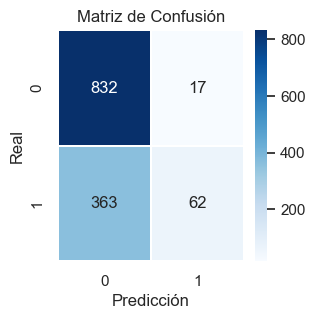

In [81]:
sns.set()

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
f, (ax1) = plt.subplots(figsize=(3,3),nrows=1)

# crear mapa de calor dibujar mapa de calor: cmap="Reds"
sns.heatmap(pd.DataFrame(cm),linewidths = 0.05, annot=True, cmap="Blues",fmt='g')
ax1.set_title('Matriz de Confusión') #título
ax1.set_xlabel('Predicción') #eje x
ax1.set_ylabel('Real') #eje y
f.savefig('XGB-1.jpg')

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.98      0.81       849
           1       0.78      0.15      0.25       425

    accuracy                           0.70      1274
   macro avg       0.74      0.56      0.53      1274
weighted avg       0.73      0.70      0.62      1274



In [83]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("R2: ",r2_score(y_test,y_pred))

Accuracy:  0.7017268445839875
Recall:  0.14588235294117646
Precision:  0.7848101265822784
F1:  0.24603174603174602
R2:  -0.3417030416406843


In [84]:
# Creamos el AUC y la curva ROC 
# obtenemos las probabilidades
lr_prob_b = lgb_classifier.predict_proba(X_test_scaled)

# Obtenemos las probabilidades de la clase positiva 
lr_prob_b = lr_prob_b[:,1]
lr_prob_b

array([0.32636239, 0.4726824 , 0.23464895, ..., 0.36208965, 0.40026157,
       0.38476408])

***Manera 1***

In [85]:
# Obtener los puntos de la curva ROC 
fpr, tpr,_ = roc_curve(y_test, lr_prob_b)

# calcular el AUC 
auc_values_b = auc(fpr, tpr)
print("AUC Score using roc_auc_score:", auc_values_b)

AUC Score using roc_auc_score: 0.7327028337836902


***Manera 2***

In [86]:
# Calculamos auc
roc_auc = roc_auc_score(y_test, lr_prob_b)
print("AUC: {:.3f}".format(roc_auc))

# Calculamos el kappa 
kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print("Kappa: {:.3f}".format(kappa))

AUC: 0.733
Kappa: 0.158


In [87]:
hist_auc.append(roc_auc)
hist_auc

[0.7377108016351417,
 0.7254846532252477,
 0.7281673941661472,
 0.7045853252961962,
 0.7355421603270282,
 0.7358179172729163,
 0.7327028337836902]

[0.717425431711146, 0.716640502354788, 0.716640502354788, 0.7182103610675039, 0.7197802197802198, 0.7189952904238619, 0.7017268445839875]


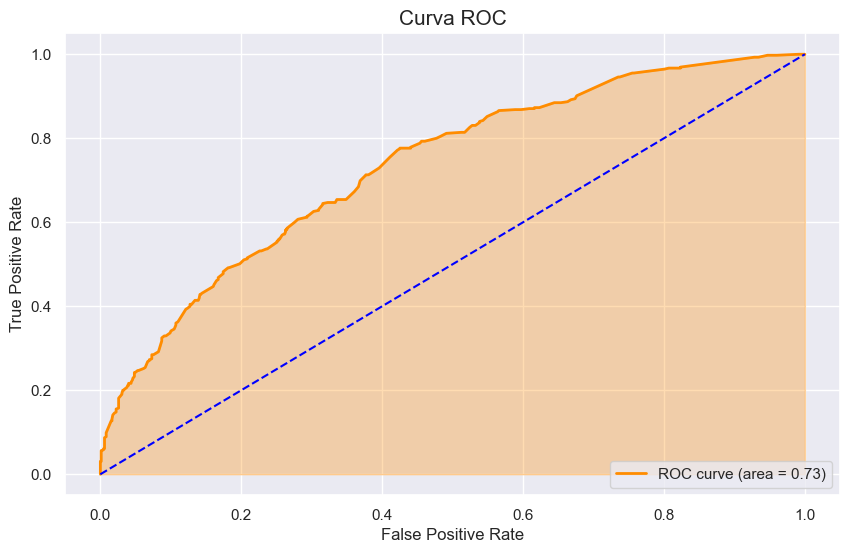

In [88]:
acc6 = accuracy_score(y_test,y_pred)
accuracy.append(acc6)
print(accuracy)

# Creamos el gráfico
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.plot(fpr, tpr, color='darkorange', linestyle='-', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Cambia el color y el estilo de la línea
plt.plot([0,1], [0, 1], color='blue', linestyle='--')  # Línea diagonal de referencia
plt.fill_between(fpr, tpr, alpha=0.3, color='darkorange')  # Área bajo la curva
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Curva ROC', fontsize=15)
plt.legend(loc='lower right')  # Posición de la leyenda
plt.grid(True)  # Agrega una cuadrícula

# Muestra el gráfico
plt.show()

### ***Histograma con todos los accuracy_score***

In [89]:
accuracy

[0.717425431711146,
 0.716640502354788,
 0.716640502354788,
 0.7182103610675039,
 0.7197802197802198,
 0.7189952904238619,
 0.7017268445839875]

In [90]:
print(len(accuracy))

7


In [91]:
ex1 = accuracy[0] #RL
ex2 = accuracy[1] #AD
ex3 = accuracy[2] #RF
ex4 = accuracy[3] #SVM
ex5 = accuracy[4] #GB
ex6 = accuracy[5] #XG
ex7 = accuracy[6] #LGB

name = ['RL:'+str(round(ex1,3)), 'AD:'+str(round(ex2,3)), 'RF:'+str(round(ex3,3)), 'SVM:'+str(round(ex4,3)), 
        'GB:'+str(round(ex5,3)), 'XG:'+str(round(ex6,3)), 'LGB:'+str(round(ex7,3))]

accuracy = np.array(accuracy)
print(accuracy)

[0.71742543 0.7166405  0.7166405  0.71821036 0.71978022 0.71899529
 0.70172684]


C:\Users\DELL\AppData\Local\Temp\ipykernel_11164\3310204100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=accuracy*100,x=name,estimator=median,palette="Blues_d")


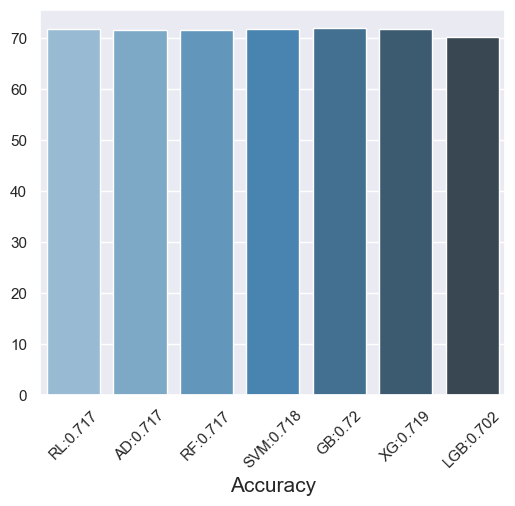

In [92]:
from numpy import median
plt.figure(figsize=(6,5))
sns.barplot(y=accuracy*100,x=name,estimator=median,palette="Blues_d")
plt.xlabel('Accuracy',size=15)
plt.xticks(rotation=45)
plt.show()

### ***Histograma con todos los valores AUC***

In [93]:
hist_auc

[0.7377108016351417,
 0.7254846532252477,
 0.7281673941661472,
 0.7045853252961962,
 0.7355421603270282,
 0.7358179172729163,
 0.7327028337836902]

In [94]:
ex1 = hist_auc[0] #RL
ex2 = hist_auc[1] #AD
ex3 = hist_auc[2] #RF
ex4 = hist_auc[3] #SVM
ex5 = hist_auc[4] #GB
ex6 = hist_auc[5] #XG
ex7 = hist_auc[6] #LGB

name = ['RL:'+str(round(ex1,3)), 'AD:'+str(round(ex2,3)), 'RF:'+str(round(ex3,3)), 'SVM:'+str(round(ex4,3)), 
        'GB:'+str(round(ex5,3)), 'XG:'+str(round(ex6,3)), 'LGB:'+str(round(ex7,3))]

hist_auc = np.array(hist_auc)
print(hist_auc)

[0.7377108  0.72548465 0.72816739 0.70458533 0.73554216 0.73581792
 0.73270283]


C:\Users\DELL\AppData\Local\Temp\ipykernel_11164\3374971003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=hist_auc*100,x=name,estimator=median,palette="Blues_d")


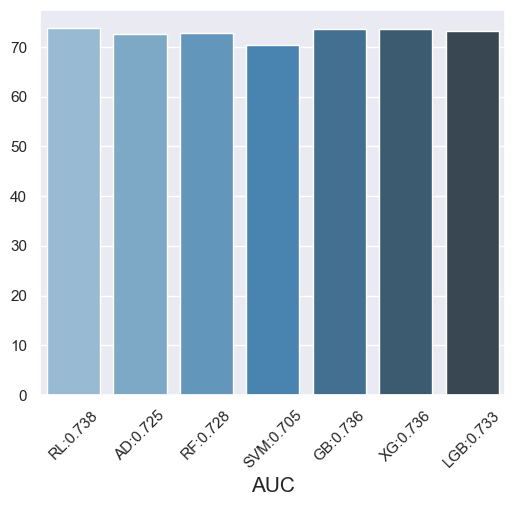

In [96]:
plt.figure(figsize=(6,5))
sns.barplot(y=hist_auc*100,x=name,estimator=median,palette="Blues_d")
plt.xlabel('AUC',size=15)
plt.xticks(rotation=45)
plt.show()

### ***Red Neuronal- Deep Learning***

In [107]:
# Importamos librerias 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from keras.layers import Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [109]:
# Construimos el modelo de red neuronal

model = Sequential([
    Dense(64, activation = 'relu', input_shape=(X_train.shape[1],), kernel_regularizer = l2(0.001)),
    Dropout(0.5),
    Dense(32, activation ='relu', kernel_regularizer = l2(0.001)),
    Dropout(0.5),
    Dense(16, activation ='relu', kernel_regularizer= l2(0.001)),
    Dropout(0,5),
    Dense(1, activation = 'relu', kernel_regularizer=l2(0.001))  
])
# Capa de dropout para reducir el sobreentrenamiento

In [110]:
# Compilar el modelo 
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics=['accuracy'] )

In [111]:
# Definir el callback de early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True)

In [112]:
history = model.fit(X_train_scaled, y_train, epochs= 50, batch_size=32,validation_data =(X_test_scaled, y_test))

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6289 - loss: 1.7850 - val_accuracy: 0.6735 - val_loss: 0.7398
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - loss: 1.0214 - val_accuracy: 0.6711 - val_loss: 0.7125
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6724 - loss: 0.7750 - val_accuracy: 0.6750 - val_loss: 0.7012
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6778 - loss: 0.7648 - val_accuracy: 0.6719 - val_loss: 0.6885
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6873 - loss: 0.6965 - val_accuracy: 0.6703 - val_loss: 0.6800
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6847 - loss: 0.7114 - val_accuracy: 0.6790 - val_loss: 0.6674
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7014 - loss: 0.6762 - val_accuracy: 0.6805 - val_loss: 0.6606
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6908 - loss: 0.6959 - val_accuracy: 0.

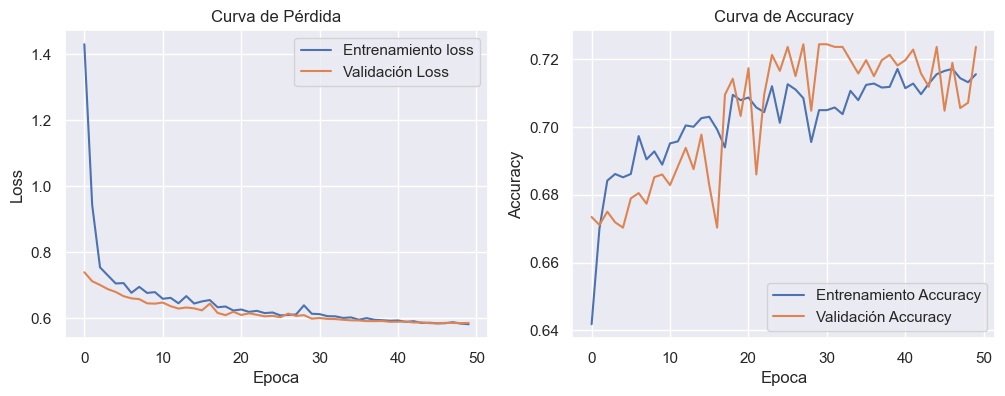

In [119]:
plt.figure(figsize=(12,4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Entrenamiento loss')
plt.plot(history.history['val_loss'], label = 'Validación Loss')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.title('Curva de Pérdida')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Entrenamiento Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validación Accuracy')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.title('Curva de Accuracy')
plt.legend()

plt.show()

El parámetro verbose puede tomar los siguientes valores:

- 0: Silencioso, no se muestra nada.
- 1: Muestra una barra de progreso que indica el avance de la evaluación.
- 2: Muestra una línea por cada lote (batch) que se evalúa, con información sobre la pérdida y la precisión.

In [113]:
# Evaluar el modelo 
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose= 2)
print(f"Loss,{test_loss}")
print(f"Accuracy,{test_accuracy}")

40/40 - 0s - 4ms/step - accuracy: 0.7237 - loss: 0.5862
Loss,0.5862460732460022
Accuracy,0.7237048745155334


In [114]:
# Obtener predicciones y calcular metricas adicionales
y_pred_proba = model.predict(X_test_scaled).ravel()
y_pred_red = (y_pred_proba > 0.5).astype(int) 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [115]:
# Matriz de confusion 
cm = confusion_matrix(y_test, y_pred_red)
print(cm)

[[737 112]
 [240 185]]


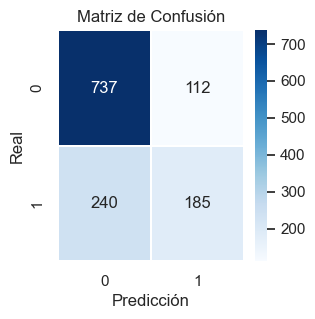

In [116]:
sns.set()

cm = confusion_matrix(y_test, y_pred_red, labels=[0,1])
f, (ax1) = plt.subplots(figsize=(3,3),nrows=1)

# crear mapa de calor dibujar mapa de calor: cmap="Reds"
sns.heatmap(pd.DataFrame(cm),linewidths = 0.05, annot=True, cmap="Blues",fmt='g')
ax1.set_title('Matriz de Confusión') #título
ax1.set_xlabel('Predicción') #eje x
ax1.set_ylabel('Real') #eje y
f.savefig('RF-1.jpg')

In [120]:
# Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

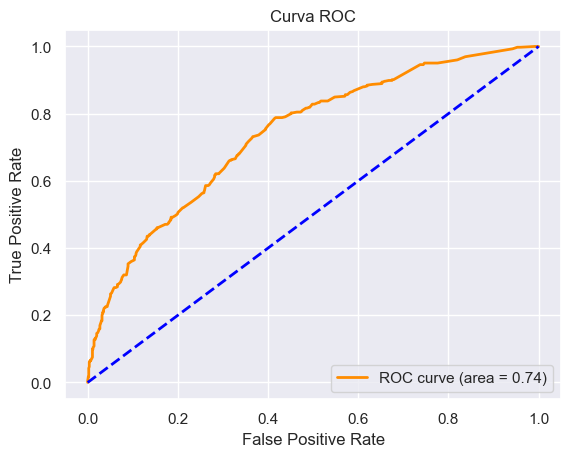

AUC: 0.739416614702418


In [122]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc}')